# Para a função a seguir;

> **2x + y2 + w = 52**

Encontre o indivíduo que pode chegar a tal resultado apenas utilizando algoritmo genético.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial import distance 

In [ ]:
def distrib_gauss(p0, pn, mean, process, show_process=False):

  x = np.linspace(p0, pn, pn)
  f = (1/(mean + 0.5* np.sqrt(2 * math.pi))) * np.exp(-0.5*((x-mean)/mean)**2)
  if show_process == True:
    plt.title('Fitness com função gaussiana para {}'.format(process))
    plt.plot(x, f)
    
  gaus_list = []
  for result in f:
    gaus_list.append(result)

  return gaus_list

def fit_x(pop_x, show):
  '''
  2x da equação... Levando em consideração que o resultado deve ser 52, x não pode passar de 26 e nem ser zero
  '''
  
  lst_pop_x = []
  gaus_distribution = distrib_gauss(0, 26, 13, '2x', show)  
  for ind, index in zip(pop_x, range(len(pop_x))):
    score_pop_x = {}    
    result = 2 * transform(ind)
    score = 0
    if result > 26:
      score = 0.1
    elif result == 0:
      score = 0.1
    elif result < 26 and result >= 0:
      fitness = gaus_distribution[result]
      score = (fitness * 100) / max(gaus_distribution)
    score_pop_x['individual'] = ind
    score_pop_x['individual_transform'] = result
    score_pop_x['score'] = score
    lst_pop_x.append(score_pop_x)
  return lst_pop_x     
  

def fit_y(pop_y, show):
  '''
  y^2 da equação... Levando em consideração que o resultado deve ser 52, y não pode passar de 7 e nem ser zero
  '''
  
  lst_pop_y = []
  gaus_distribution = distrib_gauss(0, 7, 3.5, 'y^2', show)
  for ind, index in zip(pop_y, range(len(pop_y))):
    score_pop_y = {}    
    result = 2 * transform(ind)
    score = 0
    if result > 7:
      score = 0.1
    elif result == 0:
      score = 0.1
    elif result < 7 and result >= 0:
      fitness = gaus_distribution[result]
      score = (fitness * 100) / max(gaus_distribution)
    score_pop_y['individual'] = ind
    score_pop_y['individual_transform'] = result
    score_pop_y['score'] = score
    lst_pop_y.append(score_pop_y)
  return lst_pop_y 



def fit_w(pop_w, show):
  '''
  w da equação... Levando em consideração que o resultado deve ser 52, w não pode passar de 52 e nem ser zero
  '''

  lst_pop_w = []
  gaus_distribution = distrib_gauss(0, 52, 26, 'w', show)  
  for ind, index in zip(pop_w, range(len(pop_w))):
    score_pop_w = {}    
    result = 2 * transform(ind)
    score = 0
    if result > 52:
      score = 0.1
    elif result == 0:
      score = 0.1
    elif result < 52 and result >= 0:
      fitness = gaus_distribution[result]
      score = (fitness * 100) / max(gaus_distribution)
    score_pop_w['individual'] = ind
    score_pop_w['individual_transform'] = result
    score_pop_w['score'] = score
    lst_pop_w.append(score_pop_w)
  return lst_pop_w 


def get_pop_mean(population):
  med_scores = []

  for ind in population:
    score = ind['score']
    med_scores.append(score)
  return np.mean(med_scores)  

def transform(individual):
  string_ind = ''.join([str(i) for i in individual])
  value_integer = int(string_ind, 2)
  return value_integer

def create_population(size_of_population, size_of_individual):
  p_x = []
  p_y = []
  p_w = []

  for n in range(size_of_population):
    ind_x = []
    ind_y = []
    ind_w = []

    for i in range(size_of_individual):
      information = random.randint(0, 1)
      ind_x.append(information)

    for i in range(size_of_individual):
      information = random.randint(0, 1)
      ind_y.append(information)

    for i in range(size_of_individual):
      information = random.randint(0, 1)
      ind_w.append(information)

    p_x.append(ind_x)
    p_y.append(ind_y)
    p_w.append(ind_w)

  return p_x, p_y, p_w

def combine(x, y, w):

  individuals = []

  for ind_x in x:
    for ind_y in y:
      for ind_w in w:
        x_sc = ind_x['individual_transform']
        y_sc = ind_y['individual_transform']
        w_sc = ind_w['individual_transform']

        result_combine = 2 * x_sc + y_sc ** 2 + w_sc
        if result_combine == 52:          
          individuals = [ind_x, ind_y, ind_w]

  return individuals         

def analyse(x, y, w):
  individuals = []

  for i in range(len(x)):

    x_sc = x[i]['individual_transform']
    y_sc = y[i]['individual_transform']
    w_sc = w[i]['individual_transform']
    result_analyse = 2 * x_sc + y_sc ** 2 + w_sc
    if result_analyse == 52:          
      individuals = [ind_x, ind_y, ind_w]

  return individuals

def cross_over(dad_1, dad_2):

  half = int(len(dad_1) / 2)

  dad_1 = dad_1['individual']
  dad_2 = dad_2['individual']

  dad_1_frst_half = dad_1[:half]
  dad_1_last_half = dad_1[half:]

  dad_2_frst_half = dad_2[:half]
  dad_2_last_half = dad_2[half:]

  son_1 = dad_1_frst_half + dad_2_last_half
  son_2 = dad_2_frst_half + dad_1_last_half

  return son_1, son_2

def mutate(individual):
  
  position = random.randint(0, len(individual) - 1)
  value = random.randint(0, 1)

  individual[position] = value
  random.shuffle(individual)
  return individual

def run_methods(population):

  new_population = []
  
  for i in range(0, len(population), 2):
    dad_1 = population[i]
    dad_2 = population[i+1]
    son_1, son_2 = cross_over(dad_1, dad_2)
    son_1 = mutate(son_1)
    son_2 = mutate(son_2)
    new_population.append(son_1)
    new_population.append(son_2)
    
  return new_population   
       






In [ ]:
pop_x, pop_y, pop_w = create_population(20, 8) #(População, tamanho do cromossomo)

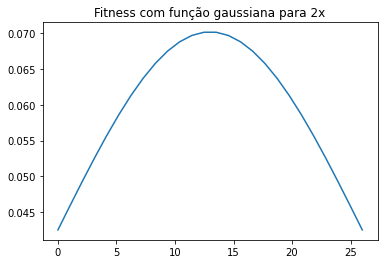

In [ ]:
x = fit_x(pop_x, show=True)

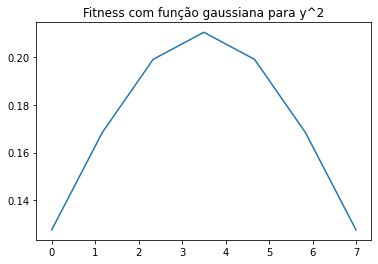

In [ ]:
y = fit_y(pop_y, show=True)

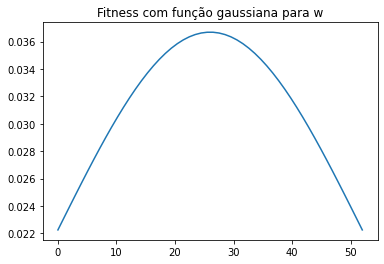

In [ ]:
w = fit_w(pop_w, show=True)

In [ ]:
pop_x, pop_y, pop_w = create_population(20, 8) #(População, tamanho do cromossomo)

result = 0
it = 0
while True:
  
  if result == 52:    
    break
  else:
    x = fit_x(pop_x, show=False)
    y = fit_y(pop_y, show=False)
    w = fit_w(pop_w, show=False)

    x = sorted(x, key=lambda d:d['score'], reverse=True)
    y = sorted(y, key=lambda d:d['score'], reverse=True)
    w = sorted(w, key=lambda d:d['score'], reverse=True)
      
    individuals = combine(x, y, w)
    #individuals = analyse(x, y, w)    
    if len(individuals) != 0:
      ind_x = individuals[0]
      ind_y = individuals[1]
      ind_w = individuals[2]
      print('2 * {} + {}² + {} = 52'.format(ind_x['individual_transform'], 
                                             ind_y['individual_transform'],
                                             ind_w['individual_transform']), 
                                             'Score {}%'.format(
                                                 np.mean([ind_x['score'],
                                                          ind_y['score'],
                                                          ind_w['score']])
                                             ))
      print(ind_x)
      print(ind_y)
      print(ind_w) 

      result = 52
    else:
      pop_x = run_methods(x)
      pop_y = run_methods(y)
      pop_w = run_methods(w)      
      

  it = it + 1

2 * 6 + 4² + 24 = 52 Score 93.9554359769448%
{'individual': [0, 0, 0, 0, 0, 0, 1, 1], 'individual_transform': 6, 'score': 87.42402985353698}
{'individual': [0, 0, 0, 0, 0, 0, 1, 0], 'individual_transform': 4, 'score': 94.59594689067654}
{'individual': [0, 0, 0, 0, 1, 1, 0, 0], 'individual_transform': 24, 'score': 99.8463311866209}


# **Encontrando mais de um indivíduo**



1.   Encontrar 5 possíveis soluções



In [ ]:
result = 0
it = 0
found = 0
while True:
  pop_x, pop_y, pop_w = create_population(20, 8) #(População, tamanho do cromossomo)
  
  if found == 5:    
    break

  else:
    x = fit_x(pop_x, show=False)
    y = fit_y(pop_y, show=False)
    w = fit_w(pop_w, show=False)

    x = sorted(x, key=lambda d:d['score'], reverse=True)
    y = sorted(y, key=lambda d:d['score'], reverse=True)
    w = sorted(w, key=lambda d:d['score'], reverse=True)
      
    individuals = combine(x, y, w)
    #individuals = analyse(x, y, w)  

    if len(individuals) != 0:
      ind_x = individuals[0]
      ind_y = individuals[1]
      ind_w = individuals[2]
      print('2 * {} + {}² + {} = 52'.format(ind_x['individual_transform'], 
                                             ind_y['individual_transform'],
                                             ind_w['individual_transform']), 
                                             'Score {}%'.format(
                                                 np.mean([ind_x['score'],
                                                          ind_y['score'],
                                                          ind_w['score']])
                                             ))
      
      found = found + 1

    else:
      pop_x = run_methods(x)
      pop_y = run_methods(y)
      pop_w = run_methods(w)      
      

  it = it + 1

2 * 26 + 0² + 0 = 52 Score 0.06666666666666667%
2 * 0 + 2² + 48 = 52 Score 54.15462538513461%
2 * 20 + 2² + 8 = 52 Score 85.74121756088077%
2 * 4 + 2² + 40 = 52 Score 86.36873239182246%
2 * 22 + 2² + 4 = 52 Score 79.89068826125738%
